<a href="https://colab.research.google.com/github/cgustin99/Data-Science/blob/main/MLBERA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [ ]:
url = "https://www.espn.com/mlb/stats/player/_/view/pitching/season/2021/seasontype/2/table/pitching/sort/ERA/dir/asc"
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")

In [ ]:
#Get columns
row = soup.find_all('tr', attrs = {'class' : 'Table__sub-header Table__TR Table__even'})[1]

columns = ['Player']
for data in row.find_all('th'):
  #print(data.get_text())
  columns.append(data.get_text())

print(columns)


['Player', 'POS', 'GP', 'GS', 'QS', 'ERA', 'W', 'L', 'SV', 'HLD', 'IP', 'H', 'ER', 'HR', 'BB', 'K', 'K/9', 'WAR', 'WHIP']


In [ ]:
#Create Data Frame with Pandas
df = pd.DataFrame(columns = columns)
df

,Player,POS,GP,GS,QS,ERA,W,L,SV,HLD,IP,H,ER,HR,BB,K,K/9,WAR,WHIP


In [ ]:
row_players = soup.find_all('a', attrs = {'class' : "AnchorLink", 'tabindex' : "0", 'href' : True})
row_players 

'''for i, data in enumerate(row_players):
  print(i, data.get_text())
  #We see players run from i=27 to 76'''
  
player_column = [data.get_text() for i, data in enumerate(row_players) if i >=27 and i <= 76]
player_column

['Walker Buehler',
 'Brandon Woodruff',
 'Corbin Burnes',
 'Lance Lynn',
 'Freddy Peralta',
 'Kevin Gausman',
 'Zack Wheeler',
 'Max Scherzer',
 'Marcus Stroman',
 'Wade Miley',
 'Robbie Ray',
 'Kyle Gibson',
 'Gerrit Cole',
 'Chris Bassitt',
 'Joe Musgrove',
 'Adam Wainwright',
 'Julio Urias',
 'Anthony DeSclafani',
 'Charlie Morton',
 'Zack Greinke',
 'Sandy Alcantara',
 'Jose Berrios',
 'Cole Irvin',
 'Tyler Mahle',
 'Casey Mize',
 'Yu Darvish',
 'Hyun Jin Ryu',
 'Sean Manaea',
 'German Marquez',
 'Chris Flexen',
 'Yusei Kikuchi',
 'Lucas Giolito',
 'Jameson Taillon',
 'Nathan Eovaldi',
 'Jon Gray',
 'Frankie Montas',
 'Dylan Cease',
 'Kyle Hendricks',
 'Nick Pivetta',
 'Tyler Anderson',
 'Merrill Kelly',
 'Dallas Keuchel',
 'Aaron Nola',
 'Luis Castillo',
 'Ryan Yarbrough',
 'Mike Minor',
 'Jordan Lyles',
 'Brad Keller',
 'Mike Foltynewicz',
 'Patrick Corbin']

In [ ]:
#Add players to df
df['Player'] = player_column
df

,Player,POS,GP,GS,QS,ERA,W,L,SV,HLD,IP,H,ER,HR,BB,K,K/9,WAR,WHIP
0,Walker Buehler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brandon Woodruff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Corbin Burnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lance Lynn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Freddy Peralta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kevin Gausman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Zack Wheeler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Max Scherzer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Marcus Stroman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Wade Miley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Find index of data with for i, data in enumerate(soup.find_all('tr')): print(data.get_text())
data_cols = []
current_data = []

#We see data rows are i = 52 to 101, append data to row vectors 
for i in range(52, 101 + 1):
  for data in soup.find_all('tr')[i]:
    current_data.append(data.get_text())
  data_cols.append(current_data)
  current_data = []


In [ ]:
#Put data into df (note that range goes to 19 because there are 18 columns in df)
#for player in range(48):
  #for data in range(1, 18):
    #df.loc[player][data] = data_cols[player][data]

for player in range(50):
  for data in range(1, len(data_cols[0]) + 1):
    df.iloc[player][data] = data_cols[player][data - 1]
df


,Player,POS,GP,GS,QS,ERA,W,L,SV,HLD,IP,H,ER,HR,BB,K,K/9,WAR,WHIP
0,Walker Buehler,SP,24,24,21,2.09,12,2,0,0,154.2,104,36,14,41,162,9.4,5.3,0.94
1,Brandon Woodruff,SP,23,23,16,2.18,7,6,0,0,140.1,91,34,11,36,163,10.5,5.1,0.90
2,Corbin Burnes,SP,20,20,13,2.23,7,4,0,0,121.0,91,30,5,21,172,12.8,4.2,0.93
3,Lance Lynn,SP,21,21,12,2.26,10,3,0,0,119.2,89,30,12,37,137,10.3,4.3,1.05
4,Freddy Peralta,RP,22,21,12,2.26,9,3,0,0,119.1,58,30,10,51,162,12.2,4.0,0.91
5,Kevin Gausman,SP,24,24,15,2.40,12,5,0,0,142.1,95,38,12,45,169,10.7,4.8,0.98
6,Zack Wheeler,SP,24,24,16,2.56,10,7,0,0,162.0,125,46,12,35,187,10.4,5.9,0.99
7,Max Scherzer,SP,22,22,13,2.69,10,4,0,0,127.1,83,38,19,31,170,12.0,3.6,0.90
8,Marcus Stroman,SP,24,24,11,2.79,8,11,0,0,132.1,118,41,12,31,114,7.8,2.4,1.13
9,Wade Miley,SP,22,22,13,2.84,10,4,0,0,133.0,119,42,10,42,104,7.0,5.8,1.21


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Get correlation information
a = 'ERA'
b = 'WHIP'
a_arr = []
b_arr = []

for i in range(len(df[a])):
  a_arr.append(float(df[a][i]))
  b_arr.append(float(df[b][i]))

corr_matrix = np.corrcoef(np.array(a_arr), np.array(b_arr))

(0.0, 42.0)

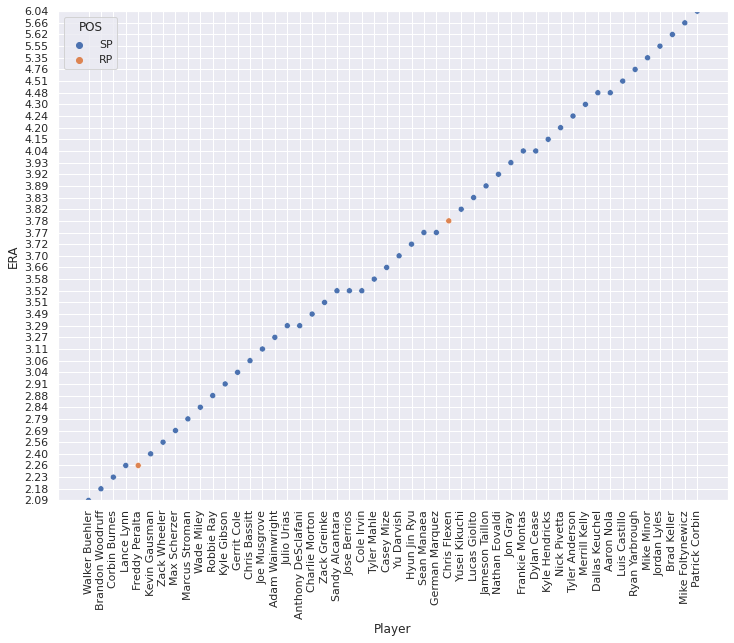

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})

sns.scatterplot(data=df, x='Player', y = 'ERA', hue = 'POS')
plt.xticks(rotation = 90)
plt.ylim(min(df['ERA']), max(df['ERA']))

Text(1, 0, '$R^2$ = 0.7295')

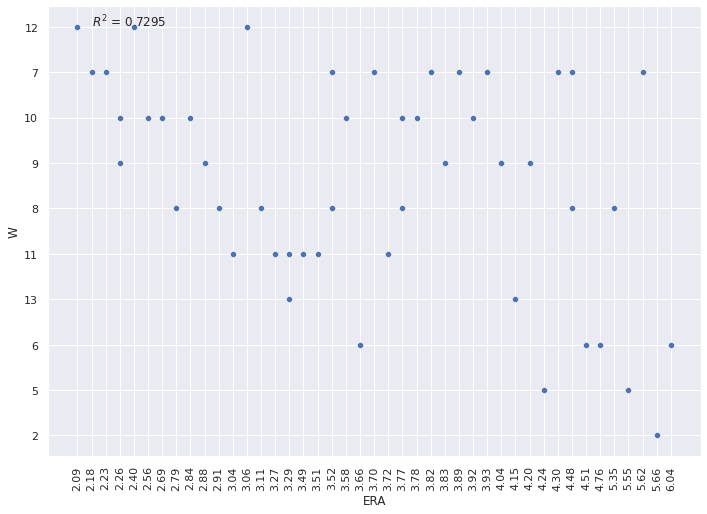

In [ ]:
sns.scatterplot(data = df, x = 'ERA', y ='W')
plt.xticks(rotation = 90)
val = corr_matrix[0][1]**2
plt.annotate(r"$R^2$ = %.4f" %val, (1, 0))

(1.0, 33.0)

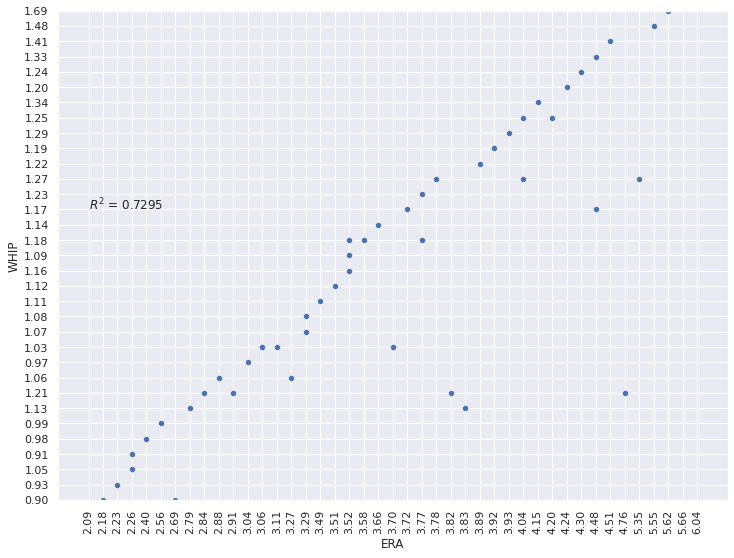

In [ ]:
sns.scatterplot(data = df, x = 'ERA', y ='WHIP')
plt.xticks(rotation = 90)
val = corr_matrix[0][1]**2
plt.annotate(r"$R^2$ = %.4f" %val, (0, 20))
plt.ylim(min(df['WHIP']), max(df['WHIP']))